# Credit Risk Classification

Credit risk poses a classification problem that’s inherently imbalanced. This is because healthy loans easily outnumber risky loans. In this Challenge, you’ll use various techniques to train and evaluate models with imbalanced classes. You’ll use a dataset of historical lending activity from a peer-to-peer lending services company to build a model that can identify the creditworthiness of borrowers.

## Instructions:

This challenge consists of the following subsections:

* Split the Data into Training and Testing Sets

* Create a Logistic Regression Model with the Original Data

* Predict a Logistic Regression Model with Resampled Training Data 

### Split the Data into Training and Testing Sets

Open the starter code notebook and then use it to complete the following steps.

1. Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

2. Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

    > **Note** A value of `0` in the “loan_status” column means that the loan is healthy. A value of `1` means that the loan has a high risk of defaulting.  

3. Check the balance of the labels variable (`y`) by using the `value_counts` function.

4. Split the data into training and testing datasets by using `train_test_split`.

### Create a Logistic Regression Model with the Original Data

Employ your knowledge of logistic regression to complete the following steps:

1. Fit a logistic regression model by using the training data (`X_train` and `y_train`).

2. Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

3. Evaluate the model’s performance by doing the following:

    * Calculate the accuracy score of the model.

    * Generate a confusion matrix.

    * Print the classification report.

4. Answer the following question: How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

### Predict a Logistic Regression Model with Resampled Training Data

Did you notice the small number of high-risk loan labels? Perhaps, a model that uses resampled data will perform better. You’ll thus resample the training data and then reevaluate the model. Specifically, you’ll use `RandomOverSampler`.

To do so, complete the following steps:

1. Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

2. Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

3. Evaluate the model’s performance by doing the following:

    * Calculate the accuracy score of the model.

    * Generate a confusion matrix.

    * Print the classification report.
    
4. Answer the following question: How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

### Write a Credit Risk Analysis Report

For this section, you’ll write a brief report that includes a summary and an analysis of the performance of both machine learning models that you used in this challenge. You should write this report as the `README.md` file included in your GitHub repository.

Structure your report by using the report template that `Starter_Code.zip` includes, and make sure that it contains the following:

1. An overview of the analysis: Explain the purpose of this analysis.


2. The results: Using bulleted lists, describe the balanced accuracy scores and the precision and recall scores of both machine learning models.

3. A summary: Summarize the results from the machine learning models. Compare the two versions of the dataset predictions. Include your recommendation for the model to use, if any, on the original vs. the resampled data. If you don’t recommend either model, justify your reasoning.

In [38]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

---

## Split the Data into Training and Testing Sets

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
lending_df = pd.read_csv(
    Path('Resources/lending_data.csv')
)

# Review the DataFrame
lending_df

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0
...,...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1


### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = lending_df["loan_status"]

# Separate the X variable, the features
X = lending_df.drop(columns = ["loan_status"])

In [4]:
# Review the y variable Series
y

0        0
1        0
2        0
3        0
4        0
        ..
77531    1
77532    1
77533    1
77534    1
77535    1
Name: loan_status, Length: 77536, dtype: int64

In [5]:
# Review the X variable DataFrame
X

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000
...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600
77532,17700.0,10.662,80900,0.629172,11,2,50900
77533,17600.0,10.595,80300,0.626401,11,2,50300
77534,16300.0,10.068,75300,0.601594,10,2,45300


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

loan_status
0    75036
1     2500
Name: count, dtype: int64

The data is clearly imbalanced!
loan_status
0    75036
1     2500
Name: count, dtype: int64

The data is clearly imbalanced!


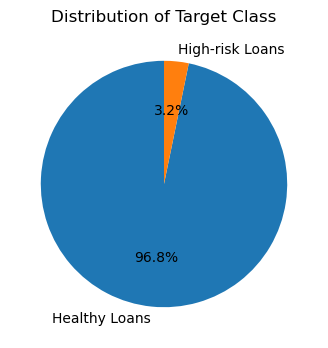

In [36]:
# Check the balance of our target values
print(y.value_counts())

print("\nThe data is clearly imbalanced!")

# Check the balance of our target values
y_value_counts = y.value_counts()
print(y_value_counts)

print("\nThe data is clearly imbalanced!")

# Data for pie chart
labels = ['Healthy Loans', 'High-risk Loans']
sizes = [y_value_counts[0], y_value_counts[1]]

# Generate pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Target Class')

# Save the plot to the specified folder and file
plt.savefig('Graphics/value_counts.png')

plt.show()

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [7]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [8]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression


In [9]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_regression_model = LogisticRegression(random_state=1)

In [10]:
# Fit the model using training data
lr_model = logistic_regression_model.fit(X_train, y_train)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [11]:
# Make a prediction using the testing data
y_pred = lr_model.predict(X_test)

# Review the first few predicted labels
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [12]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test, y_pred)

0.9520479254722232

In [13]:
# Generate a confusion matrix for the model
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")


Confusion Matrix:
[[18663   102]
 [   56   563]]
True Positives (TP): 563
True Negatives (TN): 18663
False Positives (FP): 102
False Negatives (FN): 56


In [14]:
# Print the classification report for the model
classification_report = classification_report_imbalanced(y_test, y_pred)
print(classification_report)

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.99      0.91      1.00      0.95      0.91     18765
          1       0.85      0.91      0.99      0.88      0.95      0.90       619

avg / total       0.99      0.99      0.91      0.99      0.95      0.91     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The model performs quite well in prediction both healthy and high-risk loans.  For high-risk loans it predicts it will capture about 85% of high-risk, but the recall indicates that 91% of the high-risk loans are actually captured, which is an excellent score using this type of model (linear regression).  For healthy loans, it has excellent precision and excellent recall.

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [15]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
random_oversampler = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_resampled, y_resampled = random_oversampler.fit_resample(X_train, y_train)

In [16]:
# Count the distinct values of the resampled labels data
y_resampled.value_counts()

loan_status
0    56271
1    56271
Name: count, dtype: int64

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [17]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_regression_model_resampled = LogisticRegression(random_state=1)

# Fit the model using the resampled training data
lr_model_resampled = logistic_regression_model_resampled.fit(X_resampled, y_resampled)

# Make a prediction using the resampled testing data
y_pred_resampled = lr_model_resampled.predict(X_test)



### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [18]:
# Print the balanced_accuracy score of the model 
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_resampled)

# Print the balanced accuracy score
print("Balanced Accuracy Score:", balanced_accuracy)

Balanced Accuracy Score: 0.9936781215845847


In [19]:
# Generate a confusion matrix for the model
conf_matrix_resampled = confusion_matrix(y_test, y_pred_resampled)

print("Confusion Matrix:")
print(conf_matrix_resampled)

TN_resampled = conf_matrix_resampled[0, 0]
FP_resampled = conf_matrix_resampled[0, 1]
FN_resampled = conf_matrix_resampled[1, 0]
TP_resampled = conf_matrix_resampled[1, 1]

print(f"True Positives (TP) (Resampled Data): {TP_resampled}")
print(f"True Negatives (TN) (Resampled Data): {TN_resampled}")
print(f"False Positives (FP) (Resampled Data): {FP_resampled}")
print(f"False Negatives (FN) (Resampled Data): {FN_resampled}")

Confusion Matrix:
[[18649   116]
 [    4   615]]
True Positives (TP) (Resampled Data): 615
True Negatives (TN) (Resampled Data): 18649
False Positives (FP) (Resampled Data): 116
False Negatives (FN) (Resampled Data): 4


In [24]:
from sklearn.metrics import classification_report

# Print the classification report for the model using the original test data
report = classification_report(y_test, y_pred_resampled)
print("Classification Report (Original Test Data):\n", report)


Classification Report (Original Test Data):
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** With oversampled data, the logistic regression model performs rather well.  For healthy loans, recall and precision are both excellent (which makes sense as they are the bulk of the samples).  For high-risk loans the recall is great at about 99%, which means it identifies almost all high risk loans; and with precision at 84% it means that that while it may produce a few false positives, as we are creating a risk model for loan exposures we can afford these types of false positives.

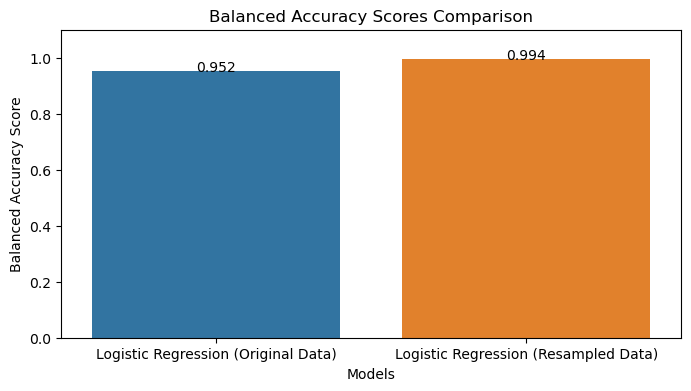

In [43]:

# Balanced Accuracy Scores for each model
balanced_accuracy_scores = [0.952, 0.994]  # Replace these with your actual balanced accuracy scores
models = ['Logistic Regression (Original Data)', 'Logistic Regression (Resampled Data)']

# Generate the bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x=models, y=balanced_accuracy_scores)
plt.title('Balanced Accuracy Scores Comparison')
plt.ylabel('Balanced Accuracy Score')
plt.xlabel('Models')
plt.ylim(0, 1.1)  # Set y-axis limits to fit the score range

# Annotate the bars with the actual scores for clarity
for i, score in enumerate(balanced_accuracy_scores):
    plt.text(i, score, str(score), ha='center')

# Save the plot to the specified folder and file
plt.savefig('Graphics/accuracy_comparison.png')

# Show the plot
plt.show()
